# Environment

In [50]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [51]:
# Set the current working directory
os.chdir('/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MECP2')

# Load Data

## Fold Change

In [52]:
DEA_NEU = pd.read_csv("./DATA/DEA_NEU.csv", header=0)
DEA_NSC = pd.read_csv("./DATA/DEA_NSC.csv", header=0)

In [53]:
DEA_NEU.head()

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,H2afy2,898.006083,-0.000002,0.096164,-0.000017,0.999986,0.999986
1,Lurap1l,248.853019,0.000021,0.175418,0.000119,0.999905,0.999970
2,Tcea1,1680.603269,0.000090,0.088197,0.001019,0.999187,0.999963
3,Igdcc4,872.289717,0.000126,0.100337,0.001255,0.998999,0.999963
4,Kdm6a,792.508606,-0.000035,0.108607,-0.000325,0.999741,0.999963


In [54]:
DEA_NEU.shape

(12945, 7)

In [55]:
DEA_NEU = DEA_NEU[DEA_NEU['padj'] < 0.05]
DEA_NSC = DEA_NSC[DEA_NSC['padj'] < 0.05]

In [56]:
print(DEA_NEU.shape)
print(DEA_NSC.shape)

(2115, 7)
(8908, 7)


In [57]:
DEA_NEU.head()

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
10830,Etohd2,52.179960,-0.875472,0.325480,-2.689789,0.007150,0.049950
10831,Prepl,6734.833093,-0.182629,0.067887,-2.690180,0.007141,0.049914
10832,Slk,2299.724144,-0.235697,0.087604,-2.690482,0.007135,0.049914
10833,Tomm34,630.507422,-0.309322,0.114977,-2.690304,0.007139,0.049914
10834,Selenon,323.325362,-0.378338,0.140572,-2.691420,0.007115,0.049798


## Expression Binning

### NEU


In [58]:
# Calculate quantiles for expression binning
q33, q66 = DEA_NEU['baseMean'].quantile([0.33, 0.66])

In [59]:
# Create a function to assign expression level
def get_expression_level(baseMean):
    if baseMean <= q33:
        return 'Low'
    elif baseMean <= q66:
        return 'Medium'
    else:
        return 'High'

In [60]:
# Add expression level column to DEA_NEU
DEA_NEU['expression_level'] = DEA_NEU['baseMean'].apply(get_expression_level)

In [61]:
# Let's see the distribution
print("Expression level boundaries:")
print(f"Low: baseMean <= {q33:.2f}")
print(f"Medium: {q33:.2f} < baseMean <= {q66:.2f}")
print(f"High: baseMean > {q66:.2f}")
print("\nNumber of genes in each category:")
print(DEA_NEU['expression_level'].value_counts())

Expression level boundaries:
Low: baseMean <= 866.41
Medium: 866.41 < baseMean <= 2189.20
High: baseMean > 2189.20

Number of genes in each category:
expression_level
High      719
Low       698
Medium    698
Name: count, dtype: int64


In [62]:
DEA_NEU.head()

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,expression_level
10830,Etohd2,52.179960,-0.875472,0.325480,-2.689789,0.007150,0.049950,Low
10831,Prepl,6734.833093,-0.182629,0.067887,-2.690180,0.007141,0.049914,High
10832,Slk,2299.724144,-0.235697,0.087604,-2.690482,0.007135,0.049914,High
10833,Tomm34,630.507422,-0.309322,0.114977,-2.690304,0.007139,0.049914,Low
10834,Selenon,323.325362,-0.378338,0.140572,-2.691420,0.007115,0.049798,Low


### NSC



In [63]:
# Calculate quantiles for expression binning
q33, q66 = DEA_NSC['baseMean'].quantile([0.33, 0.66])

In [64]:
# Add expression level column to DEA_NSC
DEA_NSC['expression_level'] = DEA_NSC['baseMean'].apply(get_expression_level)

In [65]:
# Let's see the distribution
print("Expression level boundaries:")
print(f"Low: baseMean <= {q33:.2f}")
print(f"Medium: {q33:.2f} < baseMean <= {q66:.2f}")
print(f"High: baseMean > {q66:.2f}")
print("\nNumber of genes in each category:")
print(DEA_NSC['expression_level'].value_counts())

Expression level boundaries:
Low: baseMean <= 519.34
Medium: 519.34 < baseMean <= 1777.99
High: baseMean > 1777.99

Number of genes in each category:
expression_level
High      3029
Low       2940
Medium    2939
Name: count, dtype: int64


In [66]:
DEA_NSC.head()

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,expression_level
5337,Top2b,13465.464930,-0.129776,0.055509,-2.337916,0.019392,0.049904,High
5338,Zfp113,974.648226,-0.204025,0.087200,-2.339752,0.019297,0.049670,Medium
5339,Gm48768,125.444070,0.475061,0.202973,2.340507,0.019258,0.049583,Low
5340,Pfkm,2126.364649,0.232159,0.099092,2.342858,0.019137,0.049290,High
5341,Syde2,306.400724,-0.346175,0.147748,-2.343007,0.019129,0.049280,Low


## MECP2

In [67]:
mecp2_NEU = pd.read_csv("./DATA/allgenes_NEU.csv", header=0)
mecp2_NSC = pd.read_csv("./DATA/allgenes_NSC.csv", header=0)

In [68]:
print(mecp2_NEU.shape)
print(mecp2_NSC.shape)

(80, 6)
(467, 6)


In [69]:
mecp2_NEU.head()

,gene,baseMean,log2FoldChange,Direction,Endogenous_Promoter,Exogenous_Promoter
0,Abcg2,230.797511,0.825216,UP,False,True
1,AW551984,581.286456,0.749896,UP,False,True
2,Bend5,155.132445,0.577849,UP,False,True
3,Cgn,176.027310,0.683605,UP,False,True
4,Crhr2,85.668042,0.805206,UP,False,True


# Plots

In [70]:
def volcano_plot_by_expression(df1, df2, p_value_threshold=0.05, fc_threshold=1, labels=True, promoter_type='Exogenous_Promoter', size=10):
    # Calculate -log10(pvalue) for df1
    df1['neg_log_pvalue'] = -np.log10(df1['padj'])
    
    # Create figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
    axes = {'Low': ax1, 'Medium': ax2, 'High': ax3}
    
    # Process each expression level
    for expression_level, ax in axes.items():
        # Filter data for current expression level
        df1_filtered = df1[df1['expression_level'] == expression_level]
        
        # Create mappings
        color_mapping = {}
        alpha_mapping = {}
        size_mapping = {}
        
        # Set default values
        for gene in df1_filtered['gene']:
            color_mapping[gene] = 'lightgrey'
            alpha_mapping[gene] = 0.3
            size_mapping[gene] = size
        
        # Override for genes found in df2
        for gene in df2['gene'].values:
            if gene in df1_filtered['gene'].values:
                if df2[df2['gene'] == gene][promoter_type].iloc[0]:
                    if df2[df2['gene'] == gene]['log2FoldChange'].iloc[0] > 0:
                        color_mapping[gene] = 'green'
                        alpha_mapping[gene] = 0.8
                        size_mapping[gene] = 2*size
                    if df2[df2['gene'] == gene]['log2FoldChange'].iloc[0] < 0:
                        color_mapping[gene] = 'red'
                        alpha_mapping[gene] = 0.8
                        size_mapping[gene] = 2*size
        
        # Create color lists
        colors = [color_mapping[gene] for gene in df1_filtered['gene']]
        alphas = np.array([alpha_mapping[gene] for gene in df1_filtered['gene']])
        sizes = np.array([size_mapping[gene] for gene in df1_filtered['gene']])
        
        # Plot background points
        background_mask = np.array([c == 'lightgrey' for c in colors])
        ax.scatter(df1_filtered.loc[background_mask, 'log2FoldChange'],
                  df1_filtered.loc[background_mask, 'neg_log_pvalue'],
                  c='lightgrey',
                  alpha=alphas[background_mask],
                  s=sizes[background_mask])
        
        # Plot colored points
        colored_mask = np.array([c in ['red', 'green'] for c in colors])
        ax.scatter(df1_filtered.loc[colored_mask, 'log2FoldChange'],
                  df1_filtered.loc[colored_mask, 'neg_log_pvalue'],
                  c=[c for c, m in zip(colors, colored_mask) if m],
                  alpha=alphas[colored_mask],
                  s=sizes[colored_mask])
        
        # Configure subplot
        ax.set_xlabel('log2 Fold Change', fontsize=12)
        ax.set_ylabel('-log10(p-value)', fontsize=12)
        ax.set_title(f'{expression_level} Expression Genes', fontsize=14)
        ax.grid(True, linestyle='--', alpha=0.7)
        
        # Add labels if requested
        if labels:
            pvalue_threshold = -np.log10(p_value_threshold)
            for idx, row in df1_filtered.iterrows():
                if (abs(row['log2FoldChange']) > fc_threshold) and (row['neg_log_pvalue'] > pvalue_threshold):
                    ax.annotate(row['gene'],
                              (row['log2FoldChange'], row['neg_log_pvalue']),
                              xytext=(5, 5),
                              textcoords='offset points',
                              fontsize=8)
    
    # Create common legend
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w',
                  markerfacecolor='red', label=f'{promoter_type} Enriched\n(Downregulated)', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w',
                  markerfacecolor='green', label=f'{promoter_type} Enriched\n(Upregulated)', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w',
                  markerfacecolor='lightgrey', label='Not in df2', markersize=7)
    ]
    
    fig.legend(handles=legend_elements, loc='center right')
    plt.tight_layout()
    
    return fig, axes



In [71]:
DEA_NEU_filtered = DEA_NEU[DEA_NEU['pvalue'] > 1e-300].copy()
DEA_NSC_filtered = DEA_NSC[DEA_NSC['pvalue'] > 1e-300].copy()

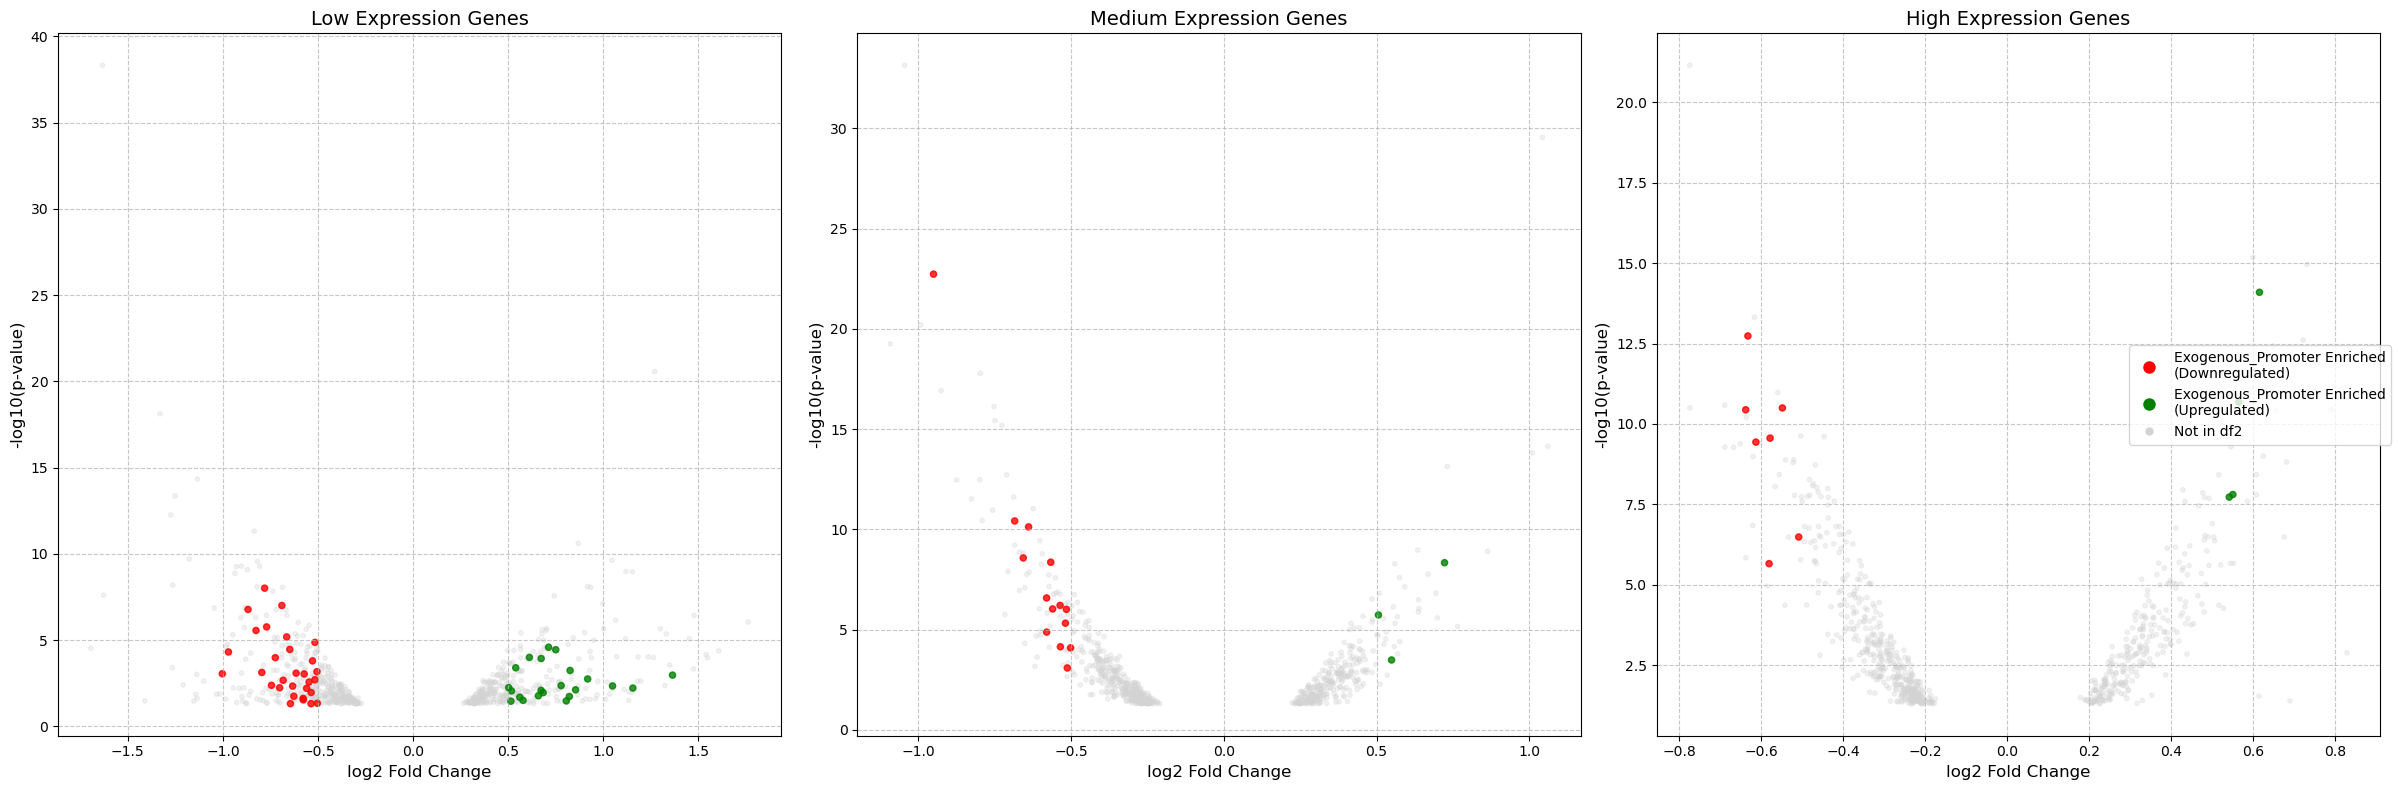

In [72]:
# Handle divide by zero warning by filtering out zero p-values
fig, axes = volcano_plot_by_expression(DEA_NEU_filtered, mecp2_NEU, p_value_threshold=0.05, fc_threshold=1, labels=False)
plt.show()

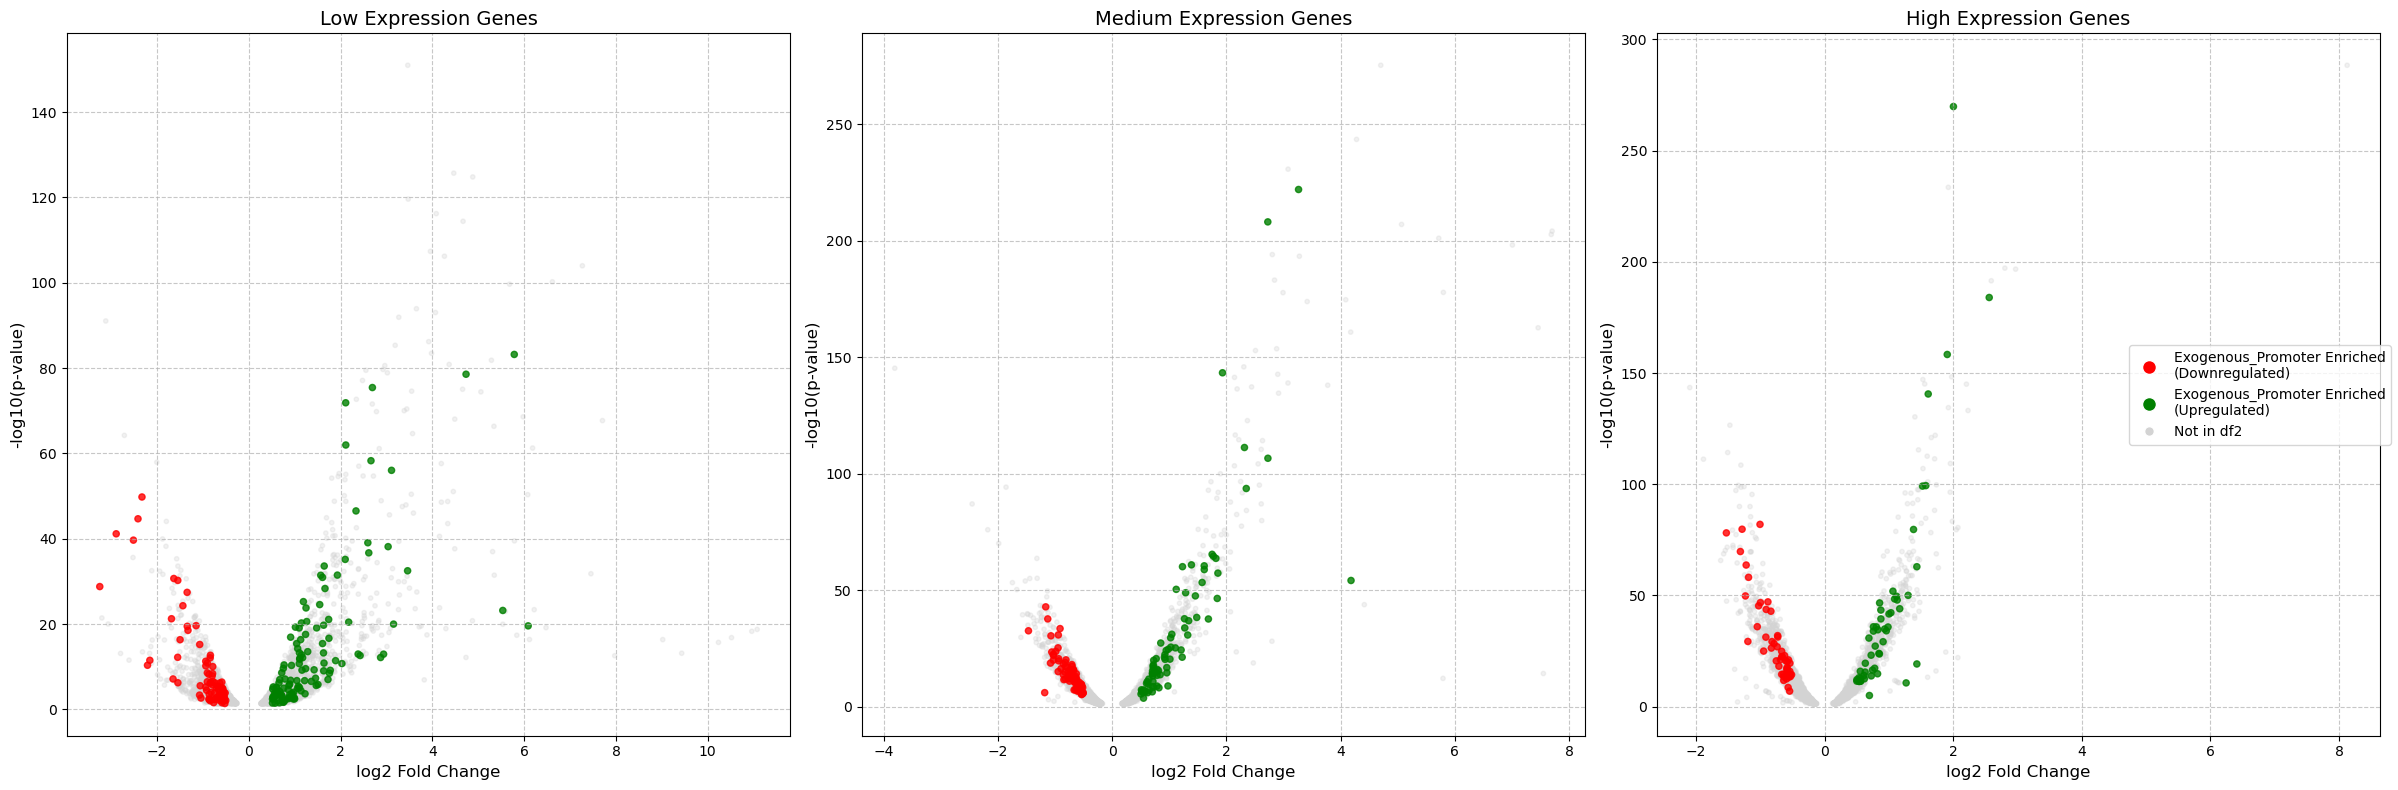

In [73]:
fig, axes = volcano_plot_by_expression(DEA_NSC_filtered, mecp2_NSC, p_value_threshold=0.05, fc_threshold=1, labels=False)
plt.show()

In [103]:
def combined_expression_scatter(df1, df2, promoter_type='Exogenous_Promoter', size=10):
    # Calculate -log10(pvalue) for df1
    df1['neg_log_pvalue'] = -np.log10(df1['padj'])
    
    # Create figure
    plt.figure(figsize=(12, 8))
    
    # Create mappings for different expression levels
    markers = {'Low': 'o', 'Medium': 'o', 'High': 'o'}
    colors = {'Low': 'blue', 'Medium': 'green', 'High': 'red'}
    sizes = {'Low': size, 'Medium': size, 'High': size}
    
    # Plot background points for each expression level
    for expression_level, marker in markers.items():
        df_filtered = df1[df1['expression_level'] == expression_level]
        
        # Plot genes not in df2
        background = ~df_filtered['gene'].isin(df2['gene'])
        plt.scatter(df_filtered[background]['log2FoldChange'],
                   df_filtered[background]['neg_log_pvalue'],
                   marker=marker,
                   c='lightgrey',
                   alpha=0.3,
                   s=sizes[expression_level],
                   label=f'{expression_level} Expression')
        
        # Plot genes in df2
        for gene in df2[df2['gene'].isin(df_filtered['gene'])]['gene']:
            gene_data = df_filtered[df_filtered['gene'] == gene]
            gene_mecp2 = df2[df2['gene'] == gene]
            
            if gene_mecp2[promoter_type].iloc[0]:
                plt.scatter(gene_data['log2FoldChange'],
                          gene_data['neg_log_pvalue'],
                          marker=marker,
                          c=colors[expression_level],  # Single color for all enriched genes
                          alpha=0.8,
                          s=sizes[expression_level])
    
    # Add legend
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors['Low'], 
                  label='Low Expression', markersize=sizes['Low']/4),
                  
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors['Medium'], 
                  label='Medium Expression', markersize=sizes['Medium']/4),
                  
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors['High'], 
                  label='High Expression', markersize=sizes['High']/4)
    ]
    
    plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Customize plot
    plt.xlabel('log2 Fold Change', fontsize=12)
    plt.ylabel('-log10(p-value)', fontsize=12)
    plt.title('Gene Expression Changes by Expression Level', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    return plt.gca()


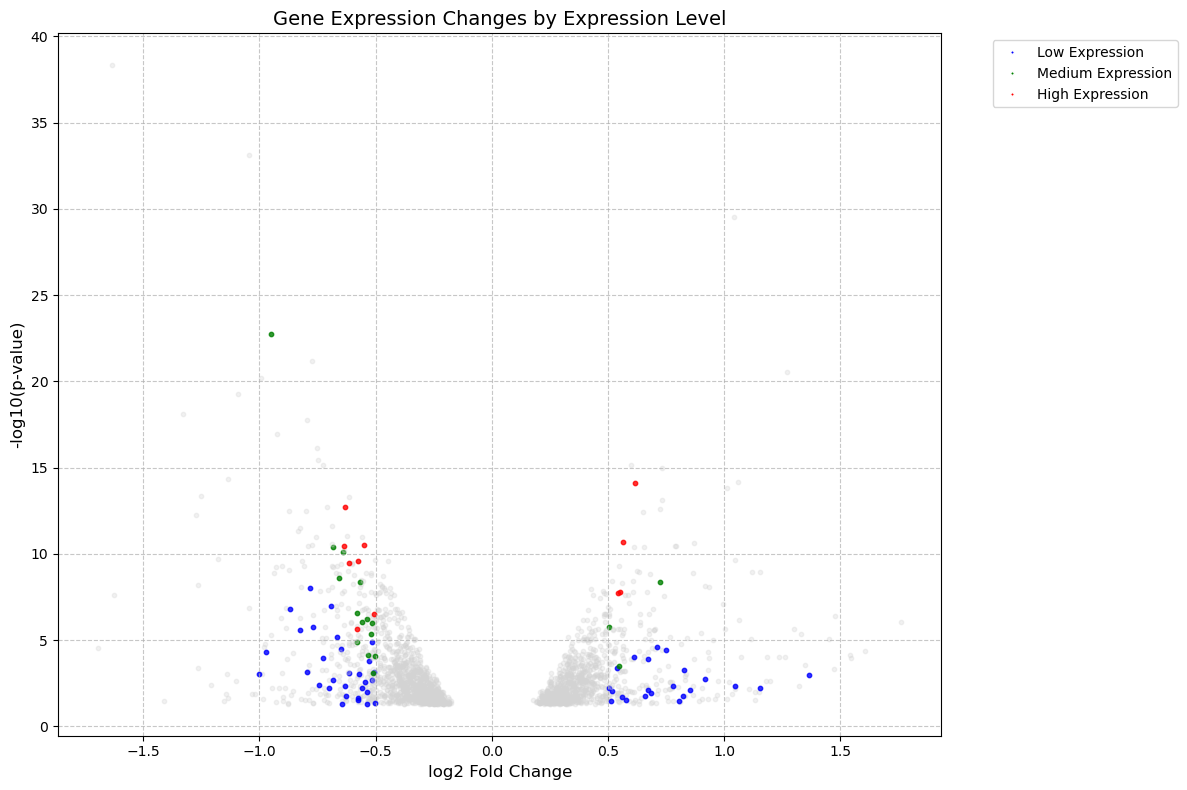

In [104]:

combined_expression_scatter(DEA_NEU_filtered, mecp2_NEU)
plt.show()

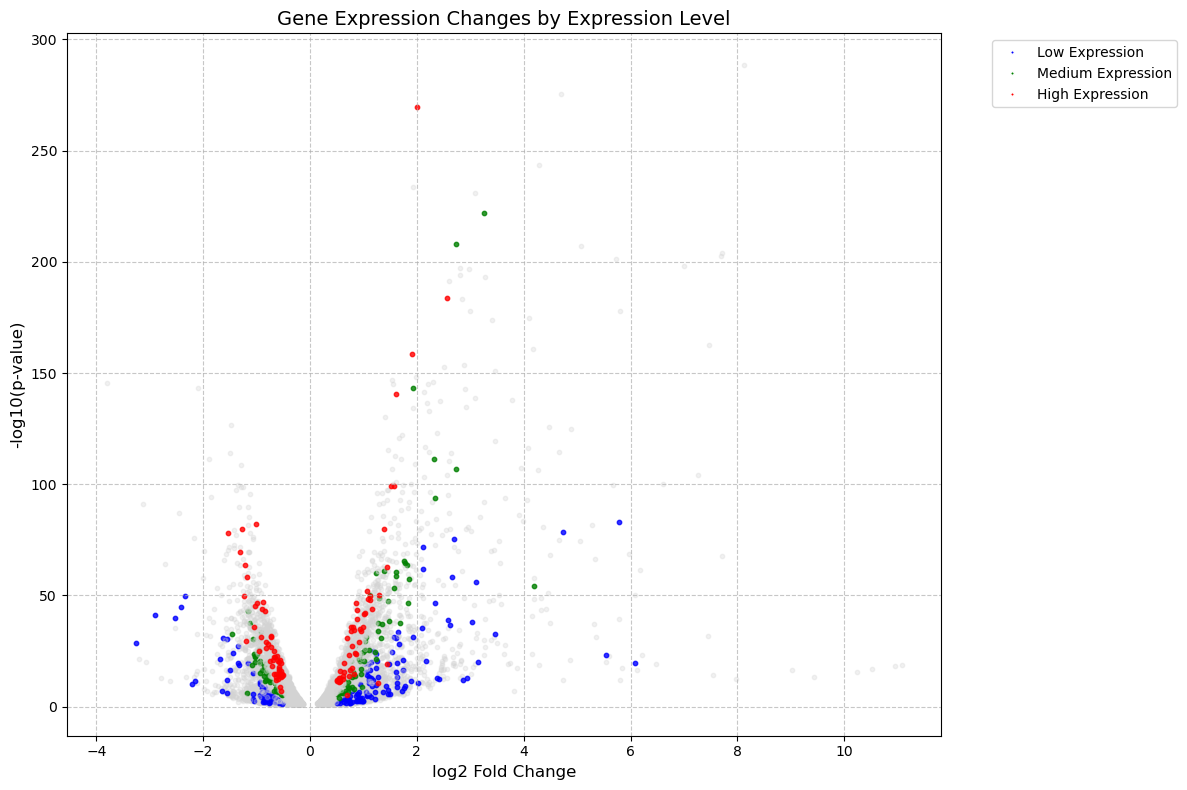

In [105]:
combined_expression_scatter(DEA_NSC_filtered, mecp2_NSC)
plt.show()

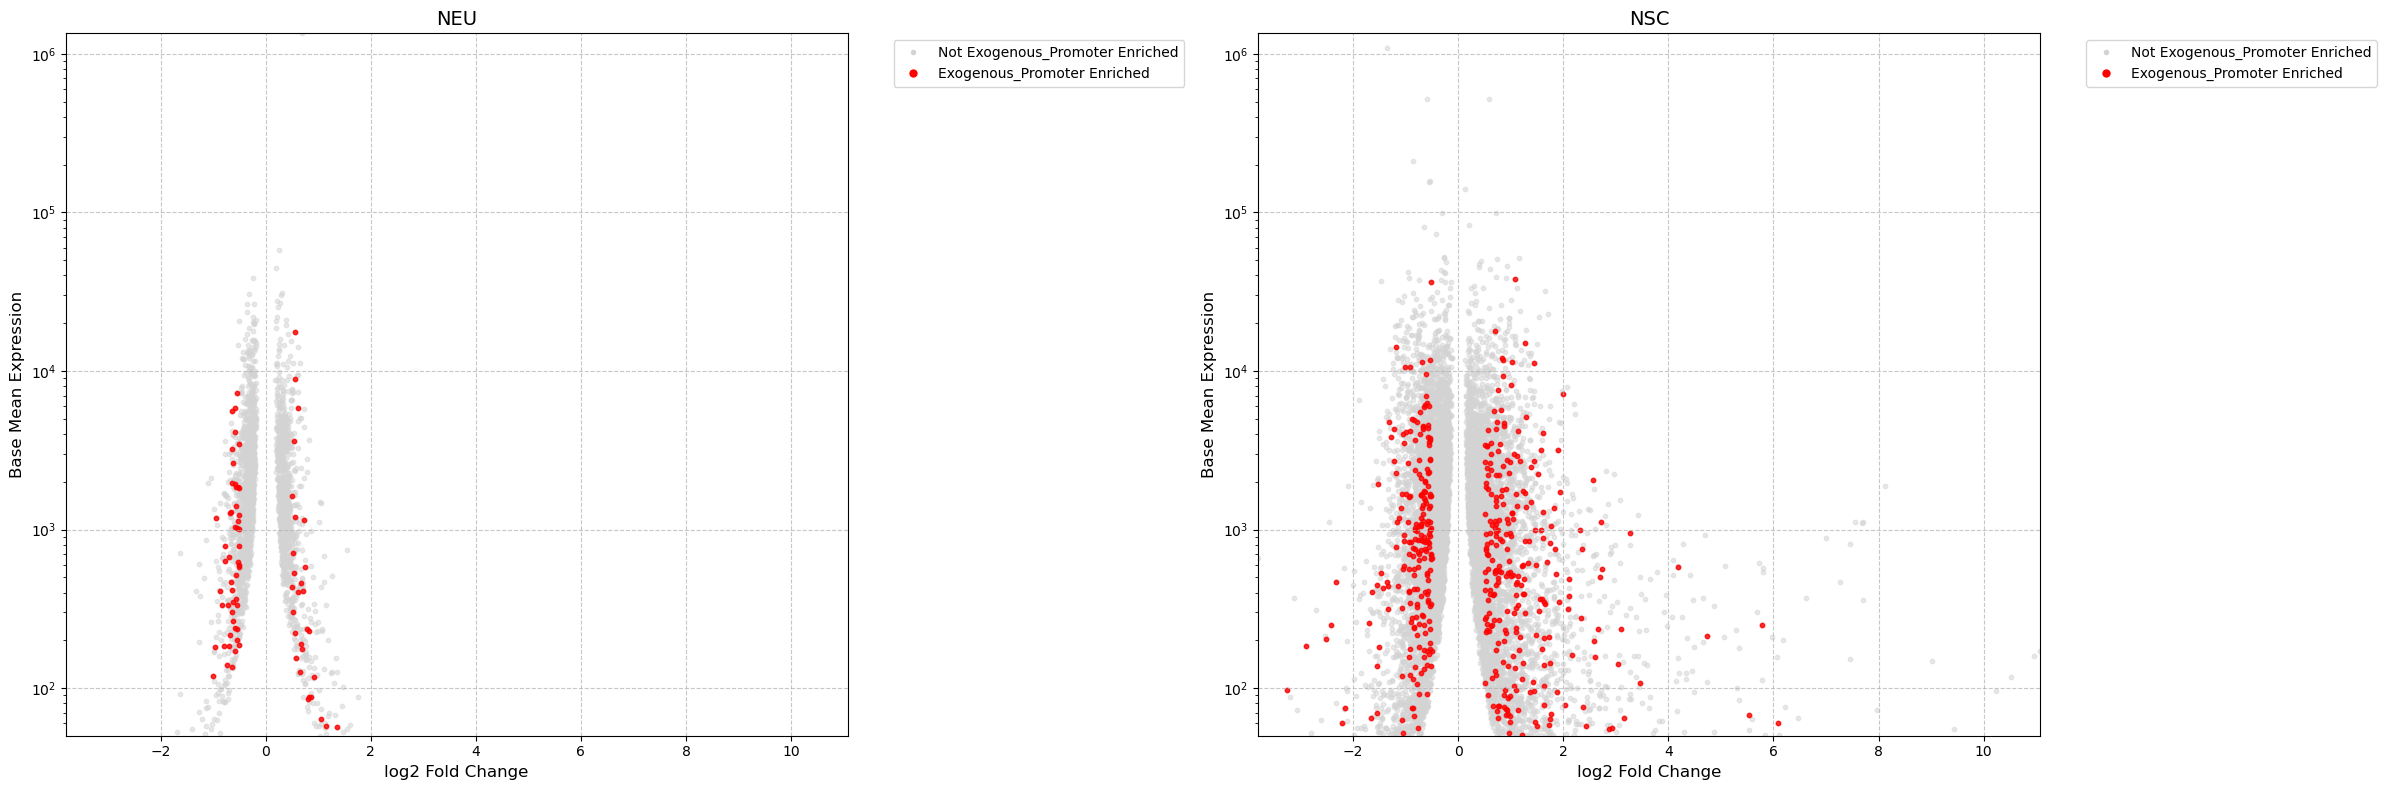

In [102]:
def combined_expression_scatter(df1, df2, ax=None, promoter_type='Exogenous_Promoter', size=10, title=None):
    # Create figure if ax not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot background points (genes not in df2)
    background = ~df1['gene'].isin(df2['gene'])
    ax.scatter(df1['log2FoldChange'],  # df1[background]['log2FoldChange'],
               df1['baseMean'],         # df1[background]['baseMean'],
              c='lightgrey',
              alpha=0.5,
              s=size)
    
    # Plot genes that are in df2 and meet the promoter type condition
    for gene in df2[df2[promoter_type]]['gene']:
        if gene in df1['gene'].values:
            gene_data = df1[df1['gene'] == gene]
            ax.scatter(gene_data['log2FoldChange'],
                     gene_data['baseMean'],
                     c='red',
                     alpha=0.8,
                     s=size)
    
    # Set y-axis to log scale
    ax.set_yscale('log')
    
    # Add legend
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgrey', 
                  label=f'Not {promoter_type} Enriched', markersize=5),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', 
                  label=f'{promoter_type} Enriched', markersize=7)
    ]
    ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Customize plot
    ax.set_xlabel('log2 Fold Change', fontsize=12)
    ax.set_ylabel('Base Mean Expression', fontsize=12)
    if title:
        ax.set_title(title, fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    return ax

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))

# Get the overall min and max values for both x and y axes
all_log2fc = pd.concat([DEA_NEU_filtered['log2FoldChange'], DEA_NSC_filtered['log2FoldChange']])
all_basemean = pd.concat([DEA_NEU_filtered['baseMean'], DEA_NSC_filtered['baseMean']])
x_min, x_max = all_log2fc.min(), all_log2fc.max()
y_min, y_max = all_basemean.min(), all_basemean.max()

# Create the plots
combined_expression_scatter(DEA_NEU_filtered, mecp2_NEU, ax=ax1, title='NEU')
combined_expression_scatter(DEA_NSC_filtered, mecp2_NSC, ax=ax2, title='NSC')

# Set the same limits for both plots
for ax in [ax1, ax2]:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()